In [1]:
#Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import glob

#Doing exact same procedure as in task 4 to calculate weekly net exports

DATA_PATH = '../data/PhysicalFlows_12.1.G/*.csv'
files = glob.glob(DATA_PATH)

dataframes = []
for f in files:
    csv = pd.read_csv(f, delimiter = '\t')
    dataframes.append(csv)
flow_data = pd.concat(dataframes, ignore_index = True)

flow_data['DateTime'] = pd.to_datetime(flow_data['DateTime'])

imports = flow_data[(flow_data['InMapCode'] == 'NO2') & (flow_data['OutMapCode'] == 'DE_LU')]

exports = flow_data[(flow_data['OutMapCode'] == 'NO2') & (flow_data['InMapCode'] == 'DE_LU')]
imports.set_index('DateTime', inplace=True)
exports.set_index('DateTime', inplace=True)

weekly_imports = imports['FlowValue'].resample('W').sum()
weekly_exports = exports['FlowValue'].resample('W').sum()

weekly_net_exports = weekly_exports - weekly_imports


In [2]:
#Loading in data from 'DayAheadPrices' 
DATA_PATH1 = '../data/DayAheadPrices_12.1.D/*.csv'
price_files = glob.glob(DATA_PATH1)

#Initializing empty list to store all csv files, enabling us to concatenate later
datas = []
for f in price_files:
    csv = pd.read_csv(f, delimiter = '\t')
    datas.append(csv)
price_data = pd.concat(datas, ignore_index = True)

# Convert 'DateTime' to datetime format and set as index
price_data['DateTime'] = pd.to_datetime(price_data['DateTime'])
price_data.set_index('DateTime', inplace=True)

# Filter price data for NO2 and Germany (DE_LU) and resample by week
no2_prices = price_data[price_data['MapCode'] == 'NO2']['Price'].resample('W').mean()
ger_prices = price_data[price_data['MapCode'] == 'DE_LU']['Price'].resample('W').mean()

# Calculate weekly average price difference (Germany - NO2)
weekly_price_difference = ger_prices - no2_prices

In [5]:
# Align the two series to ensure they have the same index
aligned_data = pd.concat([weekly_net_exports, weekly_price_difference], axis=1, join='inner')
aligned_data.columns = ['Net Exports', 'Price Difference']

In [6]:
# Calculate the correlation between net exports and price difference
correlation = aligned_data['Net Exports'].corr(aligned_data['Price Difference'])

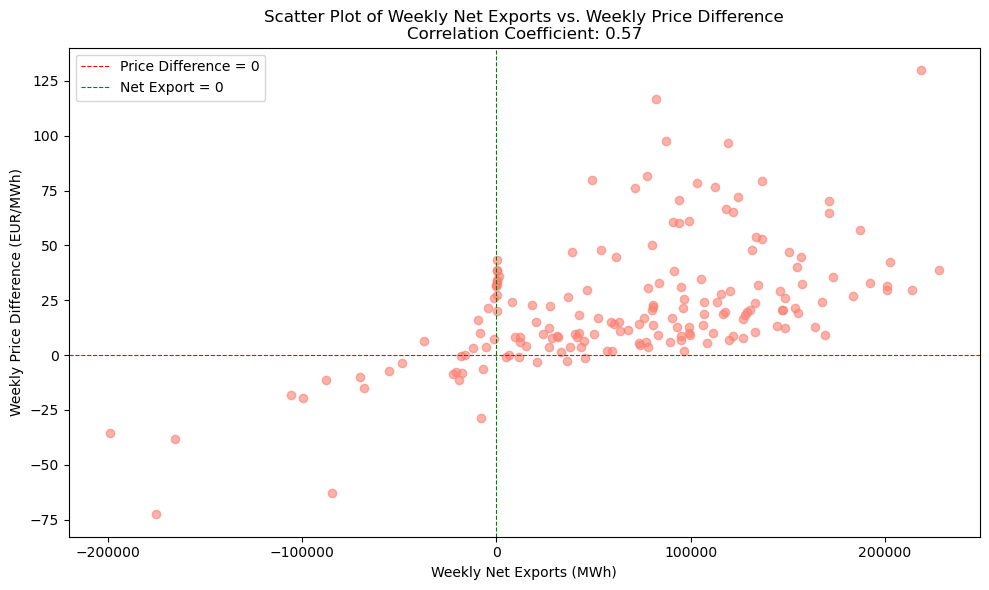

In [8]:

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(aligned_data['Net Exports'], aligned_data['Price Difference'], color='salmon', alpha=0.6)
#Customizing the scatter plot and adding correlation to the title
plt.title(f'Scatter Plot of Weekly Net Exports vs. Weekly Price Difference\nCorrelation Coefficient: {correlation:.2f}')
plt.xlabel('Weekly Net Exports (MWh)')
plt.ylabel('Weekly Price Difference (EUR/MWh)')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label='Price Difference = 0')
plt.axvline(0, color='green', linestyle='--', linewidth=0.8, label='Net Export = 0')
plt.legend()
plt.tight_layout()
# Save the scatter plot
plt.savefig('figure_task5.png')
plt.show()

Conclusion: 
The correlation coefficient of 0.57 indicates a positive correlation between the weekly sum of net exports and the weekly average price difference. This suggests that as electricity prices in Germany rise, their imports from Norway also tend to increase. The scatter plot supports this relationship, showing that higher price differences generally align with increased imports from Norway.

Notably, there is very little activity when the price difference is high but net exports are negative (indicating Norway is importing more than exporting). Similarly, there is minimal activity when the price difference is negative (meaning prices are lower in Germany), yet Norway is exporting more than importing. This pattern supports the idea that price differences drive export flows, with higher exports typically occurring when prices are higher in Germany than in Norway.